# New Text Classification: Language Anxiety

## Installing Package

In [ ]:
# !pip install xgboost lightgbm catboost
# from xgboost import XGBClassifier
# from lightgbm import LGBMClassifier
# from catboost import CatBoostClassifier

## Importing Library

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Preprocessing
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder
from sklearn.model_selection import cross_val_predict, StratifiedKFold, train_test_split, GridSearchCV

## Model
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.svm import SVC

## Utils
from sklearn.utils import shuffle, class_weight

## Text Representation
from sklearn.feature_extraction.text import TfidfVectorizer

## Model Evaluation
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, f1_score, make_scorer, accuracy_score, confusion_matrix

import warnings
warnings.filterwarnings('ignore')

## **Reading The Dataset**

In [ ]:
df = pd.read_excel('/content/dataset_2class_better.xlsx')
df.drop(columns=['Post','LA MEAN', 'shortname','idnumber','firstname','lastname','thread',
                 'charcount','wordcount','postdate','id','Timestamp', 'Kelas',
                 'Nama Lengkap sesuai Absen', 'Jenis Kelamin'], inplace=True)
df.head()

,Saya telah membaca dan memahami penjelasan dan pertanyaan yang diajukan dalam penelitian ini dan setuju untuk terlibat sebagai responden kuesioner penelitian ini secara sukarela.,Saya merasa kecewa ketika harus membuat sebuah tulisan dalam Bahasa Inggris,Saya merasa tidak percaya diri dengan keahlian menulis saya dalam Bahasa Inggris,Saya merasa gugup ketika menghadapi test menulis dalam Bahasa Inggris,Saya khawatir komposisi bahasa Inggris saya akan dikritik,Saya merasa malu melihat nilai buruk dari karangan Bahasa Inggris saya,Saya takut teman-teman akan mengkritik hasil tulisan saya dalam Bahasa Inggris,Saya merasa cemas tulisan saya dalam Bahasa Inggris akan tampak lucu,Saya takut menulis kepada penutur asli bahasa Inggris,LA Class
0,Setuju,3,3,3,3,3,3,3,4,Anxiety
1,Setuju,2,3,3,4,2,2,2,2,Anxiety
2,Setuju,1,2,3,2,2,3,3,1,No Anxiety
3,Setuju,3,3,3,3,3,3,3,3,Anxiety
4,Setuju,2,3,3,4,4,4,4,3,Anxiety


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 324 entries, 0 to 323
Data columns (total 10 columns):
 #   Column                                                                                                                                                                              Non-Null Count  Dtype 
---  ------                                                                                                                                                                              --------------  ----- 
 0   Saya telah membaca dan memahami penjelasan dan pertanyaan yang diajukan dalam penelitian ini dan setuju untuk terlibat sebagai responden kuesioner penelitian ini secara sukarela.  324 non-null    object
 1   Saya merasa kecewa ketika harus membuat sebuah tulisan dalam Bahasa Inggris                                                                                                         324 non-null    int64 
 2   Saya merasa tidak percaya diri dengan keahlian menulis  sa

## List Daftar Q1..31 Dengan Pertanyaan Aslinya

\begin{array}{|c|l|}
\hline
\textbf{No.} & \textbf{Pertanyaan} \\
\hline
Q1 & \text{Saya panik ketika harus berbicara dalam Bahasa Inggris} \\
Q2 & \text{Saya cenderung kehilangan kata-kata setiap kali harus berbicara dalam Bahasa Inggris} \\
Q3 & \text{Saya merasa tidak percaya diri setiap kali saya berbicara dalam Bahasa Inggris} \\
Q4 & \text{Saya gemetar ketika saya akan dipanggil untuk membacakan sesuatu di kelas bahasa Inggris} \\
Q5 & \text{Saya merasa gemetar hanya dengan memikirkan harus berbicara dalam Bahasa Inggris di depan kelas} \\
Q6 & \text{Saya takut Bahasa Inggris saya terdengar konyol} \\
Q7 & \text{Saya merasa takut dengan segala aktivitas yang menggunakan Bahasa Inggris} \\
Q8 & \text{Saya merasa kecewa ketika harus membuat sebuah tulisan dalam Bahasa Inggris} \\
Q9 & \text{Saya merasa tidak percaya diri dengan keahlian menulis saya dalam Bahasa Inggris} \\
Q10 & \text{Saya merasa gugup ketika menghadapi tes menulis dalam Bahasa Inggris} \\
Q11 & \text{Saya merasa takut dikoreksi ketika saya berbicara dalam Bahasa Inggris} \\
Q12 & \text{Saya khawatir komposisi bahasa Inggris saya akan dikritik} \\
Q13 & \text{Saya merasa malu melihat nilai buruk dari karangan Bahasa Inggris saya} \\
Q14 & \text{Saya takut teman-teman akan mengkritik hasil tulisan saya dalam Bahasa Inggris} \\
Q15 & \text{Saya merasa cemas tulisan saya dalam Bahasa Inggris akan tampak lucu} \\
Q16 & \text{Saya takut akan terdengar aneh ketika berbicara dengan orang asing} \\
Q17 & \text{Saya takut ketika harus berbicara dengan penutur asli Bahasa Inggris} \\
Q18 & \text{Saya takut menulis kepada penutur asli bahasa Inggris} \\
Q19 & \text{Saya menjadi gugup hanya dengan memikirkan harus berbicara kepada orang asing} \\
Q20 & \text{Saya merasa gemetar ketika harus berbicara dalam Bahasa Inggris dengan penutur asli Bahasa Inggris} \\
Q21 & \text{Saya merasa lebih rendah dari teman-teman sekelas saya dalam hal kemampuan bahasa Inggris} \\
Q22 & \text{Saya merasa tidak percaya diri dengan penampilan saya di kelas Bahasa Inggris} \\
Q23 & \text{Saya merasa saya tidak akan mendapatkan nilai bagus di kelas Bahasa Inggris} \\
Q24 & \text{Bahasa Inggris teman-teman sekelas saya lebih baik daripada saya} \\
Q25 & \text{Saya merasa saya akan gagal di kelas Bahasa Inggris} \\
Q26 & \text{Saya merasa lebih rendah dari teman-teman sekelas saya dalam hal kemampuan bahasa Inggris} \\
Q27 & \text{Saya takut saya tidak benar-benar memahami materi dalam Bahasa Inggris yang saya baca} \\
Q28 & \text{Saya takut saya tidak memahami secara akurat materi dalam Bahasa Inggris yang saya dengar} \\
Q29 & \text{Saya takut saya tidak memahami petunjuk yang ditulis dalam Bahasa Inggris} \\
Q30 & \text{Saya takut saya tidak memahami diskusi dalam Bahasa Inggris} \\
Q31 & \text{Saya takut saya tidak dapat memberikan informasi secara detail dari materi dalam Bahasa Inggris yang saya baca} \\
\hline
\end{array}

## Checking Class Distribution

In [ ]:
print(df['LA Classification'].value_counts())
print()

# create LA Classification visualization
sns.countplot(x='LA Classification', data=df)
plt.show()

KeyError: 'LA Classification'

## **Encode The Target Variable**

In [ ]:
# Menggunakan mapping manual dengan map
df['la_class'] = df['LA Class'].map({'Anxiety': 1, 'No Anxiety': 0})

# Menampilkan hasil
print("Mapping kelas ke nilai encoded:")
print(df[['LA Class', 'la_class']])

# Menghapus kolom asli
df.drop(columns=['LA Class'], inplace=True)

Mapping kelas ke nilai encoded:
       LA Class  la_class
0       Anxiety         1
1       Anxiety         1
2    No Anxiety         0
3       Anxiety         1
4       Anxiety         1
..          ...       ...
319     Anxiety         1
320     Anxiety         1
321  No Anxiety         0
322     Anxiety         1
323     Anxiety         1

[324 rows x 2 columns]


In [ ]:
df.head()

,Saya telah membaca dan memahami penjelasan dan pertanyaan yang diajukan dalam penelitian ini dan setuju untuk terlibat sebagai responden kuesioner penelitian ini secara sukarela.,Saya merasa kecewa ketika harus membuat sebuah tulisan dalam Bahasa Inggris,Saya merasa tidak percaya diri dengan keahlian menulis saya dalam Bahasa Inggris,Saya merasa gugup ketika menghadapi test menulis dalam Bahasa Inggris,Saya khawatir komposisi bahasa Inggris saya akan dikritik,Saya merasa malu melihat nilai buruk dari karangan Bahasa Inggris saya,Saya takut teman-teman akan mengkritik hasil tulisan saya dalam Bahasa Inggris,Saya merasa cemas tulisan saya dalam Bahasa Inggris akan tampak lucu,Saya takut menulis kepada penutur asli bahasa Inggris,la_class
0,Setuju,3,3,3,3,3,3,3,4,1
1,Setuju,2,3,3,4,2,2,2,2,1
2,Setuju,1,2,3,2,2,3,3,1,0
3,Setuju,3,3,3,3,3,3,3,3,1
4,Setuju,2,3,3,4,4,4,4,3,1


## Splitting The Data

In [ ]:
X = df.drop('la_class', axis=1)
y = df['la_class']

## Correlation Matrix

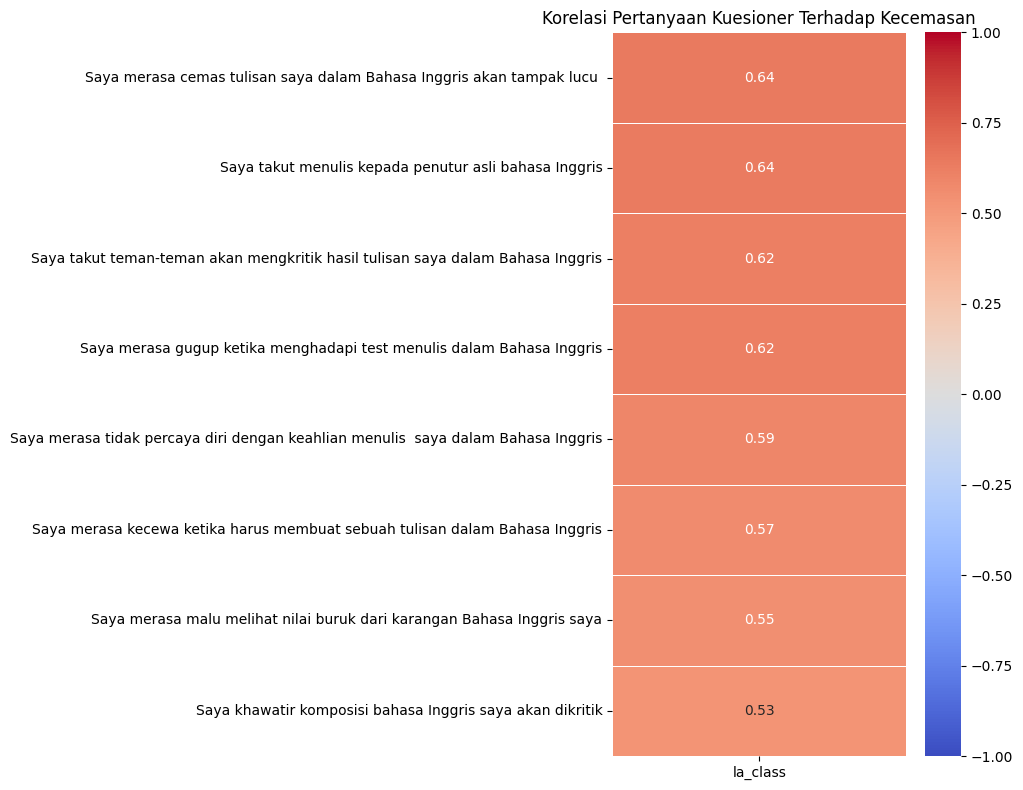

In [ ]:
# Ambil atribut q1 hingga q31 dan label la_class
features = df.iloc[:, 1:32]  # Atribut q1 hingga q31
features['la_class'] = y  # Tambahkan label ke DataFrame

# Hitung matrix korelasi
correlation_matrix = features.corr()

# Ambil korelasi antara atribut q1 hingga q31 dan label la_class
correlation_with_label = correlation_matrix[['la_class']].iloc[:-1]  # Hilangkan baris untuk 'la_class' itu sendiri

# Urutkan berdasarkan nilai korelasi dengan label dari yang terbesar
correlation_with_label = correlation_with_label.sort_values(by='la_class', ascending=False)

# Visualisasi dengan heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_with_label, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, vmin=-1, vmax=1)
plt.title('Korelasi Pertanyaan Kuesioner Terhadap Kecemasan')
plt.tight_layout()
plt.show()

## Defining Models

In [ ]:
models = {
    "Logistic Regression": LogisticRegression(class_weight='balanced'),
    "Decision Tree": DecisionTreeClassifier(class_weight='balanced'),
    "Random Forest": RandomForestClassifier(class_weight='balanced'),
    "Naive Bayes": GaussianNB(),
    "SVM": SVC(class_weight='balanced'),
    "XGBoost": XGBClassifier(scale_pos_weight=(len(y) - sum(y)) / sum(y)),
    "LightGBM": LGBMClassifier(scale_pos_weight=(len(y) - sum(y)) / sum(y)),
    "CatBoost": CatBoostClassifier(
        iterations=1000,
        learning_rate=0.05,
        depth=6,
        scale_pos_weight=(len(y) - sum(y)) / sum(y),
        task_type="GPU"
    )
}

## Defining Cross Validation

In [ ]:
cv = StratifiedKFold(n_splits=5)

## Calculating Each Model Performance

In [ ]:
results = []
for model_name, model in models.items():
    accuracy_scores = cross_val_score(model, X, y, cv=cv, scoring='accuracy')
    precision_scores = cross_val_score(model, X, y, cv=cv, scoring='precision')
    recall_scores = cross_val_score(model, X, y, cv=cv, scoring='recall')
    f1_scores = cross_val_score(model, X, y, cv=cv, scoring='f1')

    results.append({
        'Model': model_name,
        'Accuracy': accuracy_scores.mean(),
        'Precision': precision_scores.mean(),
        'Recall': recall_scores.mean(),
        'F1-score': f1_scores.mean()
    })

results_df = pd.DataFrame(results)

Streaming output truncated to the last 5000 lines.
0:	learn: 0.6294125	total: 15.3ms	remaining: 15.3s
1:	learn: 0.5722379	total: 38.1ms	remaining: 19s
2:	learn: 0.5277054	total: 52.7ms	remaining: 17.5s
3:	learn: 0.4870931	total: 67.2ms	remaining: 16.7s
4:	learn: 0.4510548	total: 91.1ms	remaining: 18.1s
5:	learn: 0.4154809	total: 112ms	remaining: 18.6s
6:	learn: 0.3938103	total: 136ms	remaining: 19.3s
7:	learn: 0.3663562	total: 160ms	remaining: 19.8s
8:	learn: 0.3520030	total: 176ms	remaining: 19.4s
9:	learn: 0.3316498	total: 201ms	remaining: 19.9s
10:	learn: 0.3166400	total: 237ms	remaining: 21.3s
11:	learn: 0.2973856	total: 262ms	remaining: 21.5s
12:	learn: 0.2844797	total: 288ms	remaining: 21.8s
13:	learn: 0.2706239	total: 312ms	remaining: 22s
14:	learn: 0.2575890	total: 344ms	remaining: 22.6s
15:	learn: 0.2457984	total: 362ms	remaining: 22.3s
16:	learn: 0.2348587	total: 389ms	remaining: 22.5s
17:	learn: 0.2240621	total: 403ms	remaining: 22s
18:	learn: 0.2129558	total: 427ms	remainin

In [ ]:
results_df

,Model,Accuracy,Precision,Recall,F1-score
0,Logistic Regression,0.978413,0.991833,0.979167,0.985347
1,Decision Tree,0.891923,0.915431,0.925255,0.909985
2,Random Forest,0.953702,0.960222,0.987500,0.969566
3,Naive Bayes,0.978413,0.995918,0.975085,0.985260
4,SVM,0.978462,0.987667,0.983333,0.985391
5,XGBoost,0.941394,0.959081,0.962670,0.960773
6,LightGBM,0.947500,0.963500,0.966752,0.964939
7,CatBoost,0.963029,0.972075,0.979167,0.975333


## Model Performances Visualization

### Accuracy

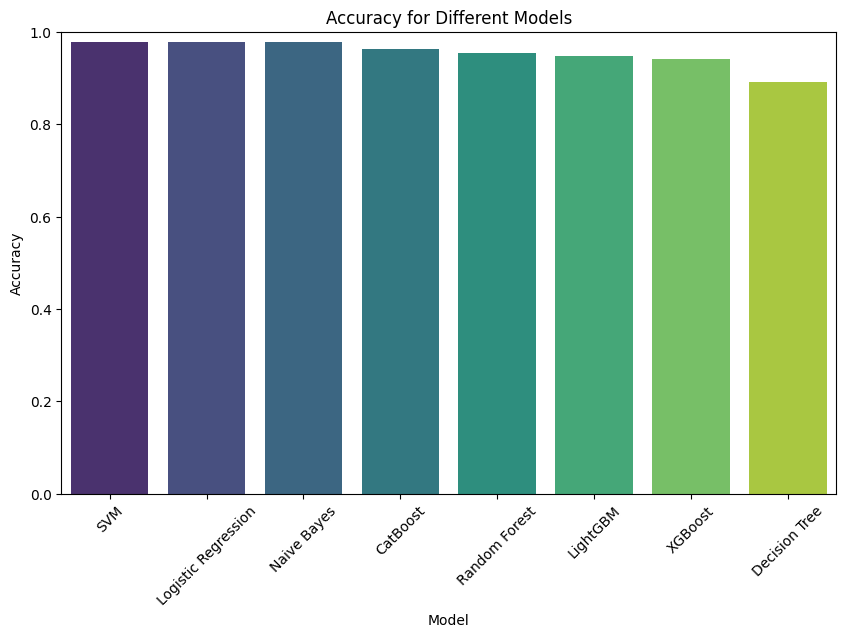

In [ ]:
plt.figure(figsize=(10, 6))
sorted_df = results_df.sort_values(by='Accuracy', ascending=False)
sns.barplot(x='Model', y='Accuracy', data=sorted_df, palette='viridis')
plt.title('Accuracy for Different Models')
plt.ylabel('Accuracy')
plt.xlabel('Model')
plt.xticks(rotation=45)
plt.ylim(0, 1)
plt.show()

### Precision

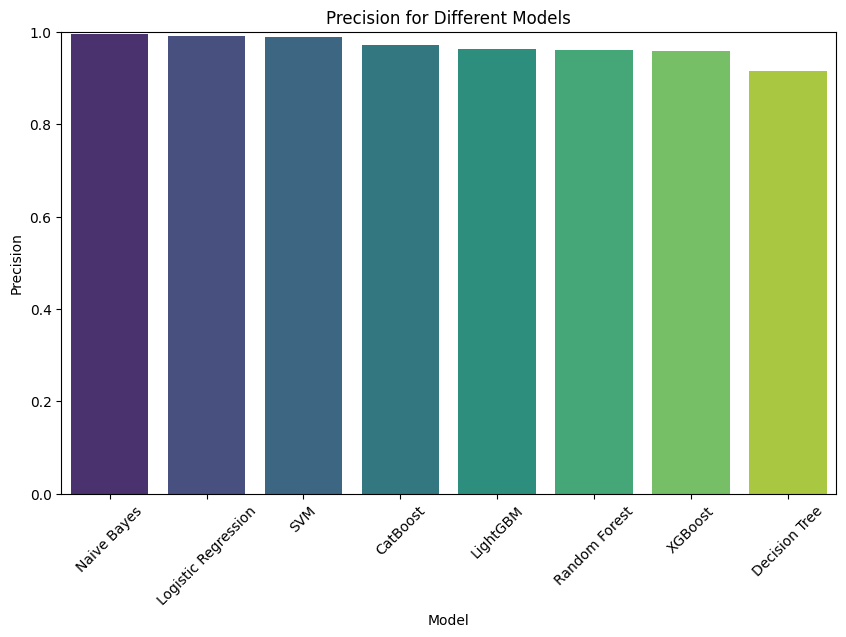

In [ ]:
plt.figure(figsize=(10, 6))
sorted_df = results_df.sort_values(by='Precision', ascending=False)
sns.barplot(x='Model', y='Precision', data=sorted_df, palette='viridis')
plt.title('Precision for Different Models')
plt.ylabel('Precision')
plt.xlabel('Model')
plt.xticks(rotation=45)
plt.ylim(0, 1)
plt.show()

### Recall

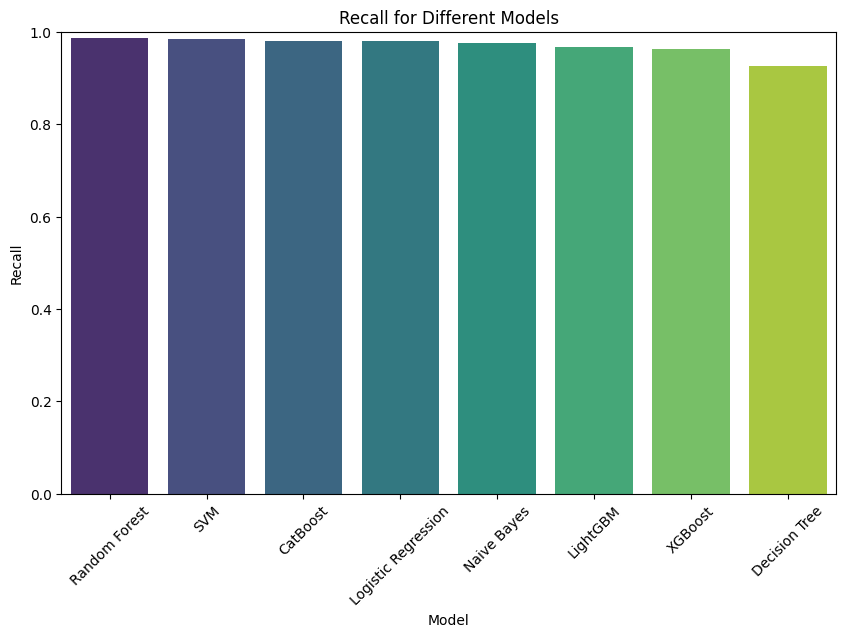

In [ ]:
plt.figure(figsize=(10, 6))
sorted_df = results_df.sort_values(by='Recall', ascending=False)
sns.barplot(x='Model', y='Recall', data=sorted_df, palette='viridis')
plt.title('Recall for Different Models')
plt.ylabel('Recall')
plt.xlabel('Model')
plt.xticks(rotation=45)
plt.ylim(0, 1)
plt.show()

### F1-score

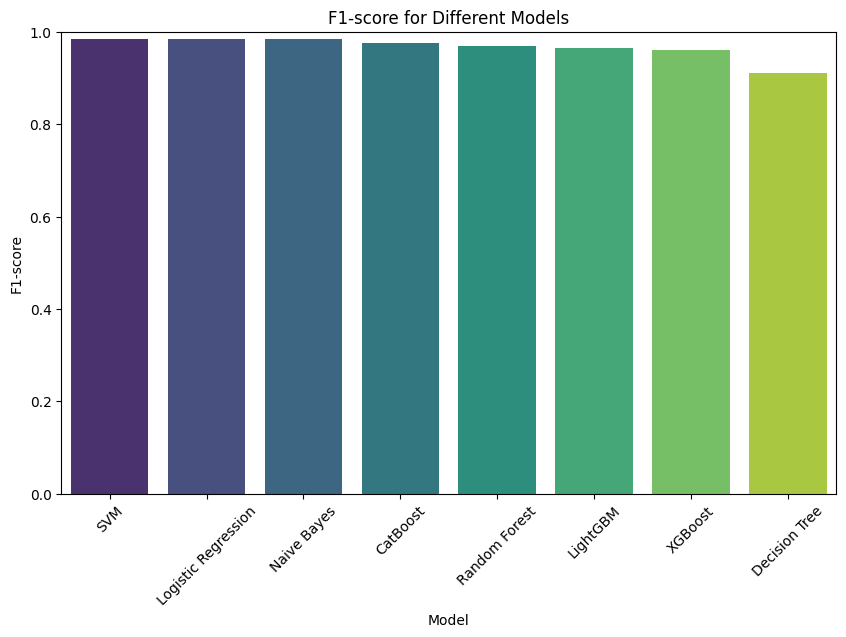

In [ ]:
plt.figure(figsize=(10, 6))
sorted_df = results_df.sort_values(by='F1-score', ascending=False)
sns.barplot(x='Model', y='F1-score', data=sorted_df, palette='viridis')
plt.title('F1-score for Different Models')
plt.ylabel('F1-score')
plt.xlabel('Model')
plt.xticks(rotation=45)
plt.ylim(0, 1)
plt.show()

## Feature Importances

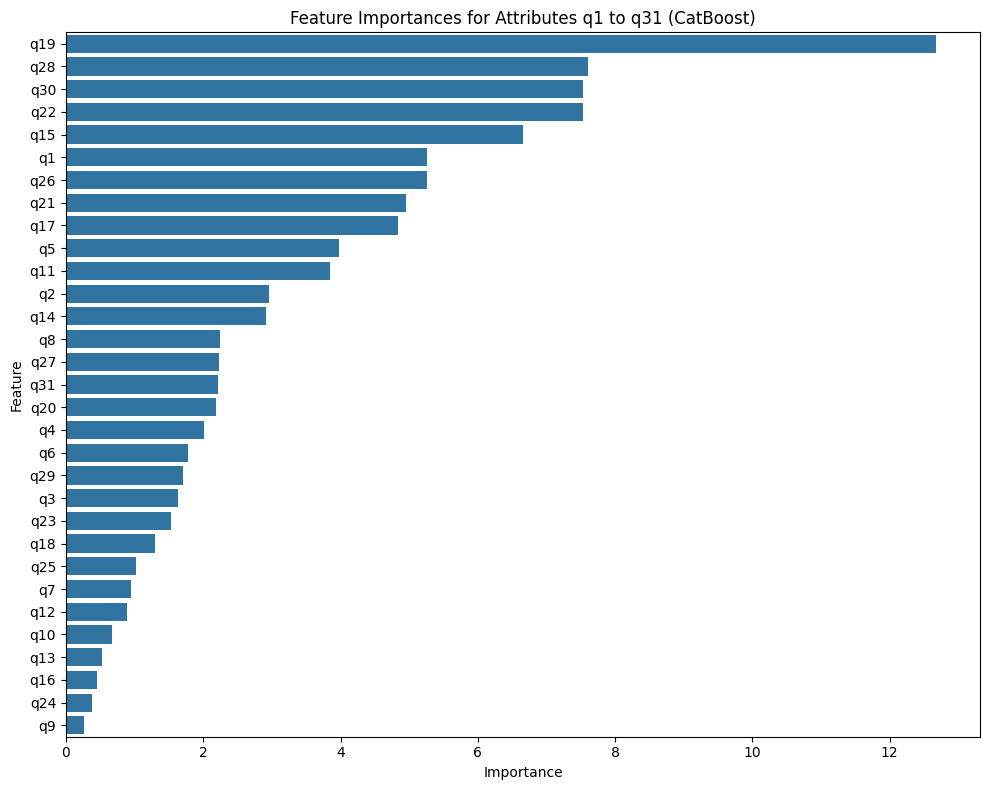

In [ ]:
# Membagi data menjadi training dan testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

# Melatih CatBoostClassifier
catboost_model = CatBoostClassifier(
        iterations=1000,
        learning_rate=0.05,
        depth=6,
        scale_pos_weight=(len(y) - sum(y)) / sum(y),
        task_type="GPU",
        random_state = 42,
        silent=True
    )
catboost_model.fit(X_train, y_train)

# Mendapatkan feature importances
importances = catboost_model.get_feature_importance()

# Hanya memilih atribut q1 hingga q31
features = ['q' + str(i) for i in range(1, 32)]
importances_q_features = importances[:31]  # Hanya untuk q1 sampai q31

# Membuat DataFrame untuk visualisasi
feature_importances = pd.DataFrame({'Feature': features, 'Importance': importances_q_features})

# Mengurutkan feature importances
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Membuat visualisasi feature importances
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importances)
plt.title('Feature Importances for Attributes q1 to q31 (CatBoost)')
plt.tight_layout()
plt.show()

In [ ]:
feature_importances

,Feature,Importance
18,q19,12.681103
27,q28,7.603826
29,q30,7.537287
21,q22,7.528256
14,q15,6.661568
0,q1,5.258532
25,q26,5.256712
20,q21,4.948180
16,q17,4.840853
4,q5,3.979545


## SVM Hyperparameter Tuning

In [ ]:
# Definisikan parameter yang akan diuji
param_grid = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}

# Inisialisasi model SVM
svm_model = SVC(class_weight='balanced')

# Inisialisasi GridSearchCV
grid_search = GridSearchCV(svm_model, param_grid, cv=5, scoring='f1')

# Lakukan pencarian grid pada data training
grid_search.fit(X_train, y_train)

# Cetak parameter terbaik
print("Parameter terbaik:", grid_search.best_params_)

print()

# Cetak skor F1 terbaik
print("Skor F1 terbaik:", grid_search.best_score_)

# Evaluasi model terbaik pada data testing
best_svm_model = grid_search.best_estimator_
y_pred = best_svm_model.predict(X_test)

print(classification_report(y_test, y_pred))

Parameter terbaik: {'C': 1, 'kernel': 'rbf'}

Skor F1 terbaik: 0.9861470191009069
              precision    recall  f1-score   support

           0       0.88      1.00      0.93        21
           1       1.00      0.95      0.97        60

    accuracy                           0.96        81
   macro avg       0.94      0.97      0.95        81
weighted avg       0.97      0.96      0.96        81



## Feature Selection

### Top 5

In [ ]:
# Memilih 5 fitur teratas
top_n = 5
top_features = feature_importances.head(top_n)['Feature'].tolist()

# Membuat subset dari data berdasarkan fitur-fitur terpilih
X_train_selected = X_train[top_features]
X_test_selected = X_test[top_features]

# Definisikan parameter yang akan diuji
param_grid = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}

# Inisialisasi model SVM
svm_model = SVC(class_weight='balanced')

# Inisialisasi GridSearchCV
grid_search = GridSearchCV(svm_model, param_grid, cv=5, scoring='f1')

# Lakukan pencarian grid pada data training yang sudah dipilih fiturnya
grid_search.fit(X_train_selected, y_train)

# Cetak parameter terbaik
print("Parameter terbaik:", grid_search.best_params_)

# Cetak skor F1 terbaik
print("Skor F1 terbaik:", grid_search.best_score_)

# Evaluasi model terbaik pada data testing
best_svm_model = grid_search.best_estimator_
y_pred = best_svm_model.predict(X_test_selected)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))

Parameter terbaik: {'C': 0.1, 'kernel': 'rbf'}
Skor F1 terbaik: 0.9662677434469833
Accuracy: 0.8888888888888888
Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.95      0.82        21
           1       0.98      0.87      0.92        60

    accuracy                           0.89        81
   macro avg       0.85      0.91      0.87        81
weighted avg       0.91      0.89      0.89        81



### Top 10

In [ ]:
# Memilih 10 fitur teratas
top_n = 10
top_features = feature_importances.head(top_n)['Feature'].tolist()

# Membuat subset dari data berdasarkan fitur-fitur terpilih
X_train_selected = X_train[top_features]
X_test_selected = X_test[top_features]

# Definisikan parameter yang akan diuji
param_grid = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}

# Inisialisasi model SVM
svm_model = SVC(class_weight='balanced')

# Inisialisasi GridSearchCV
grid_search = GridSearchCV(svm_model, param_grid, cv=5, scoring='f1')

# Lakukan pencarian grid pada data training yang sudah dipilih fiturnya
grid_search.fit(X_train_selected, y_train)

# Cetak parameter terbaik
print("Parameter terbaik:", grid_search.best_params_)

# Cetak skor F1 terbaik
print("Skor F1 terbaik:", grid_search.best_score_)

# Evaluasi model terbaik pada data testing
best_svm_model = grid_search.best_estimator_
y_pred = best_svm_model.predict(X_test_selected)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))

Parameter terbaik: {'C': 10, 'kernel': 'linear'}
Skor F1 terbaik: 0.9888888888888889
Accuracy: 0.9259259259259259
Classification Report:
              precision    recall  f1-score   support

           0       0.78      1.00      0.88        21
           1       1.00      0.90      0.95        60

    accuracy                           0.93        81
   macro avg       0.89      0.95      0.91        81
weighted avg       0.94      0.93      0.93        81



### Top 15

In [ ]:
# Memilih 15 fitur teratas
top_n = 15
top_features = feature_importances.head(top_n)['Feature'].tolist()

# Membuat subset dari data berdasarkan fitur-fitur terpilih
X_train_selected = X_train[top_features]
X_test_selected = X_test[top_features]

# Definisikan parameter yang akan diuji
param_grid = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}

# Inisialisasi model SVM
svm_model = SVC(class_weight='balanced')

# Inisialisasi GridSearchCV
grid_search = GridSearchCV(svm_model, param_grid, cv=5, scoring='f1')

# Lakukan pencarian grid pada data training yang sudah dipilih fiturnya
grid_search.fit(X_train_selected, y_train)

# Cetak parameter terbaik
print("Parameter terbaik:", grid_search.best_params_)

# Cetak skor F1 terbaik
print("Skor F1 terbaik:", grid_search.best_score_)

# Evaluasi model terbaik pada data testing
best_svm_model = grid_search.best_estimator_
y_pred = best_svm_model.predict(X_test_selected)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))

Parameter terbaik: {'C': 1, 'kernel': 'linear'}
Skor F1 terbaik: 0.9916275430359939
Accuracy: 0.9382716049382716
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.95      0.89        21
           1       0.98      0.93      0.96        60

    accuracy                           0.94        81
   macro avg       0.91      0.94      0.92        81
weighted avg       0.94      0.94      0.94        81



### Top 20

In [ ]:
# Memilih 20 fitur teratas
top_n = 20
top_features = feature_importances.head(top_n)['Feature'].tolist()

# Membuat subset dari data berdasarkan fitur-fitur terpilih
X_train_selected = X_train[top_features]
X_test_selected = X_test[top_features]

# Definisikan parameter yang akan diuji
param_grid = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}

# Inisialisasi model SVM
svm_model = SVC(class_weight='balanced')

# Inisialisasi GridSearchCV
grid_search = GridSearchCV(svm_model, param_grid, cv=5, scoring='f1')

# Lakukan pencarian grid pada data training yang sudah dipilih fiturnya
grid_search.fit(X_train_selected, y_train)

# Cetak parameter terbaik
print("Parameter terbaik:", grid_search.best_params_)

# Cetak skor F1 terbaik
print("Skor F1 terbaik:", grid_search.best_score_)

# Evaluasi model terbaik pada data testing
best_svm_model = grid_search.best_estimator_
y_pred = best_svm_model.predict(X_test_selected)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))

Parameter terbaik: {'C': 0.1, 'kernel': 'linear'}
Skor F1 terbaik: 0.9943661971830986
Accuracy: 0.9506172839506173
Classification Report:
              precision    recall  f1-score   support

           0       0.84      1.00      0.91        21
           1       1.00      0.93      0.97        60

    accuracy                           0.95        81
   macro avg       0.92      0.97      0.94        81
weighted avg       0.96      0.95      0.95        81



### Top 25

In [ ]:
# Memilih 25 fitur teratas
top_n = 25
top_features = feature_importances.head(top_n)['Feature'].tolist()

# Membuat subset dari data berdasarkan fitur-fitur terpilih
X_train_selected = X_train[top_features]
X_test_selected = X_test[top_features]

# Definisikan parameter yang akan diuji
param_grid = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}

# Inisialisasi model SVM
svm_model = SVC(class_weight='balanced')

# Inisialisasi GridSearchCV
grid_search = GridSearchCV(svm_model, param_grid, cv=5, scoring='f1')

# Lakukan pencarian grid pada data training yang sudah dipilih fiturnya
grid_search.fit(X_train_selected, y_train)

# Cetak parameter terbaik
print("Parameter terbaik:", grid_search.best_params_)

# Cetak skor F1 terbaik
print("Skor F1 terbaik:", grid_search.best_score_)

# Evaluasi model terbaik pada data testing
best_svm_model = grid_search.best_estimator_
y_pred = best_svm_model.predict(X_test_selected)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))

Parameter terbaik: {'C': 0.1, 'kernel': 'linear'}
Skor F1 terbaik: 0.991549295774648
Accuracy: 0.9506172839506173
Classification Report:
              precision    recall  f1-score   support

           0       0.84      1.00      0.91        21
           1       1.00      0.93      0.97        60

    accuracy                           0.95        81
   macro avg       0.92      0.97      0.94        81
weighted avg       0.96      0.95      0.95        81

